In [3]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import quandl
import scipy
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
import datetime

# sklearn :: utils
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# sklearn :: models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

sns.set_style('whitegrid')

In [86]:
#load datasets
quandl.ApiConfig.api_key = '1x62xPokqcRhHMTZH3ok'
data = quandl.get_table('WIKI/PRICES', ticker = ['AAPL','AMZN', 'FB' ,'NFLX', 'GOOGL', 'TSLA', 'BABA', 'NVDA', 'AXP', 'BBY', 'CMCSA', 'EA', 'INTC', 'JNPR', 'LLL'], 
                        qopts = { 'columns': ['ticker', 'date', 'high', 'low','open', 'close', 'volume'] }, 
                        date = { 'gte': '2012-05-01', 'lte': '2018-05-01' },
                        paginate = True)

data.columns = ['symbol', 'date', 'high', 'low','open', 'close', 'volume']

#save to csv
data.to_csv("./file2.csv", sep=',',index=False)

start_sp = datetime.datetime(2012, 5, 1)
end_sp = datetime.datetime(2018, 5, 1)

yf.pdr_override() # <== that's all it takes :-)
sp500 = pdr.get_data_yahoo('^GSPC', 
                           start_sp,
                             end_sp)

sp500.head()

[*********************100%***********************]  1 of 1 downloaded


/home/bda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

/home/bda/anaconda3/lib/python3.6/site-packages/fix_yahoo_finance/__init__.py:199: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  data = data.swapaxes(0, 2)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-01,1397.859985,1415.319946,1395.729980,1405.819946,1405.819946,3807950000
2012-05-02,1405.500000,1405.500000,1393.920044,1402.310059,1402.310059,3803860000
2012-05-03,1402.319946,1403.069946,1388.709961,1391.569946,1391.569946,4004910000
2012-05-04,1391.510010,1391.510010,1367.959961,1369.099976,1369.099976,3975140000
2012-05-07,1368.790039,1373.910034,1363.939941,1369.579956,1369.579956,3559390000


In [87]:
data.head()

,symbol,date,high,low,open,close,volume
None,,,,,,,
0,AAPL,2012-05-01,596.7600,581.23,584.90,582.13,21821400.0
1,AAPL,2012-05-02,587.3999,578.86,580.24,585.98,15263900.0
2,AAPL,2012-05-03,591.4000,580.30,590.50,581.82,13948200.0
3,AAPL,2012-05-04,578.3600,565.17,577.08,565.25,18928300.0
4,AAPL,2012-05-07,572.7700,561.23,561.50,569.48,16432800.0


In [88]:
AAPL = data[data['symbol'] == "AAPL"]
AAPL.head()
AAPL['date']=pd.to_datetime(AAPL['date'])

/home/bda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [89]:
sp500 = sp500.reset_index(drop=True)
APPL = APPL.reset_index(drop=True)

df = pd.concat([sp500[['Close', 'Volume']], APPL[['close']]], axis=1)

#remove NaN from APPLE stock
df.dropna(subset=['close'], inplace = True)

df

,Close,Volume,close
0,1405.819946,3807950000,582.130
1,1402.310059,3803860000,585.980
2,1391.569946,4004910000,581.820
3,1369.099976,3975140000,565.250
4,1369.579956,3559390000,569.480
5,1363.719971,4261670000,568.180
6,1354.579956,4288540000,569.180
7,1357.989990,3727990000,570.520
8,1353.390015,3869070000,566.710
9,1338.349976,3688120000,558.220


In [90]:
# feature engineering
X_columns = ['Close', 'Volume']
y_column = ['close']

In [91]:
# split the data

threshold = 0.8
X = df[X_columns]
y = df[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (1187, 2)
y_train (1187, 1)
X_test (297, 2)
y_test (297, 1)


MODEL LinearRegression
MAE 115.04325329115203
RMSE 131.30152300675226


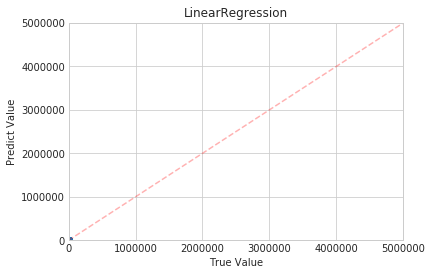

Feature Importance
        0             1
1  Volume -4.483319e-08
0   Close -3.999507e-01

MODEL RandomForestRegressor10
MAE 15.013820202020197
RMSE 35.0610793522776


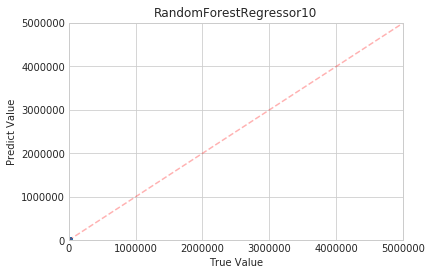

Feature Importance
        0         1
0   Close  0.939098
1  Volume  0.060902

MODEL RandomForestRegressor100
MAE 14.824454336700343
RMSE 31.647391116041536


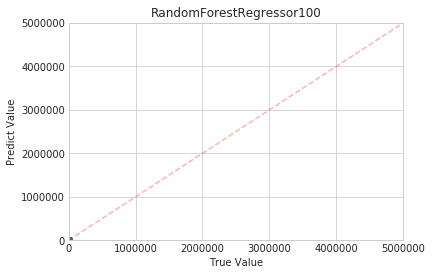

Feature Importance
        0         1
0   Close  0.940924
1  Volume  0.059076

MODEL KNeighborsRegressor
MAE 190.1646501010101
RMSE 221.1009527018348


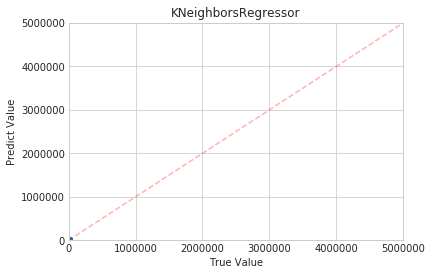


MODEL DecisionTreeRegressor
MAE 16.86291043771044
RMSE 49.12819413626051


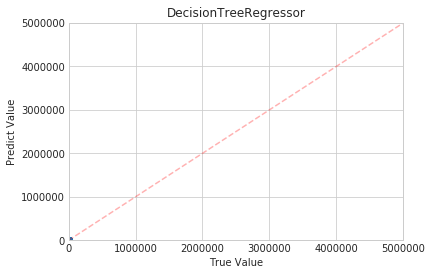

Feature Importance
        0         1
0   Close  0.937036
1  Volume  0.062964



,model,mae,rmse
2,RandomForestRegressor100,14.824454,31.647391
1,RandomForestRegressor10,15.013820,35.061079
4,DecisionTreeRegressor,16.862910,49.128194
0,LinearRegression,115.043253,131.301523
3,KNeighborsRegressor,190.164650,221.100953


In [92]:
models = [
    ('LinearRegression', LinearRegression()),
    ('RandomForestRegressor10', RandomForestRegressor(n_estimators=10)),
    ('RandomForestRegressor100', RandomForestRegressor(n_estimators=100)),
    ('KNeighborsRegressor', KNeighborsRegressor()),
    ('DecisionTreeRegressor', DecisionTreeRegressor())
]
results = []
for m in models:
    print('MODEL', m[0])
    model = m[1]
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print('MAE', mae)
    print('RMSE', rmse)
    # print the chart
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot(range(0,5000000, 100), range(0,5000000, 100), '--r', alpha=0.3, label='Line1')
    plt.title(m[0])
    plt.xlabel('True Value')
    plt.ylabel('Predict Value')
    plt.xlim([0, 5000000])
    plt.ylim([0, 5000000])
    plt.show()
    results.append([m[0], mae, rmse])
    
    # if there is a feature importance, print top 5
    importance = []
    if hasattr(model, 'feature_importances_'):
        print('Feature Importance')
        importance = []
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.feature_importances_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head())
    elif hasattr(model, 'coef_'):
        print('Feature Importance')
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.coef_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head())
        
    print('')

# sort the results and print as a table
df_results = pd.DataFrame(results)
df_results.columns = ['model', 'mae', 'rmse']
df_results = df_results.sort_values(by='mae')
df_results

## I notice that the RandomForestRegressor100 is the best model between the 5 since it has the least MAE & RMSE

In [93]:
models = [
    ('LinearRegression', LinearRegression()),
    ('RandomForestRegressor10', RandomForestRegressor(n_estimators=10)),
    ('RandomForestRegressor100', RandomForestRegressor(n_estimators=100, n_jobs=4)),
    ('KNeighborsRegressor', KNeighborsRegressor()),
    ('DecisionTreeRegressor', DecisionTreeRegressor())
]

k = 10
results = {}
for m in models:
    print('MODEL', m[0])
    results[m[0]] = {'mae':[], 'rmse':[]}
    kf = KFold(n_splits=k)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        model = m[1]
        model.fit(X_train, y_train.ravel())
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        results[m[0]]['mae'].append(mae)
        results[m[0]]['rmse'].append(rmse)

MODEL LinearRegression
MODEL RandomForestRegressor10
MODEL RandomForestRegressor100
MODEL KNeighborsRegressor
MODEL DecisionTreeRegressor


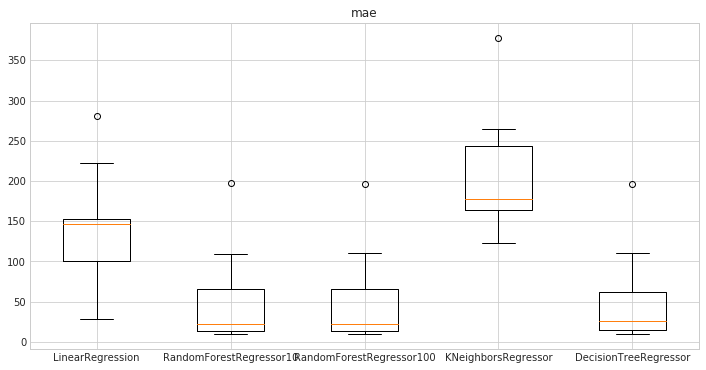

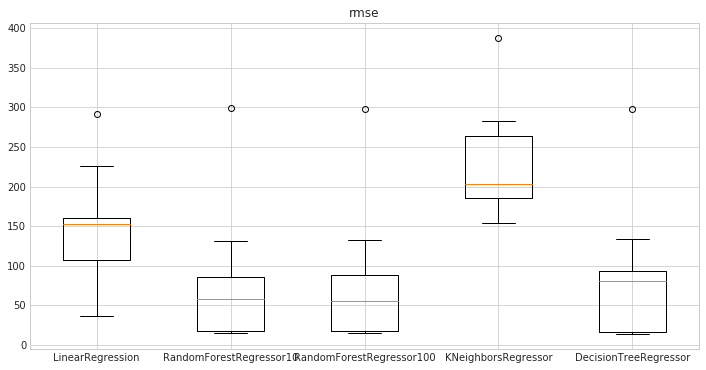

In [94]:
for metric in ['mae', 'rmse']:
    values = []
    labels = []
    for model, result_values in results.items():
        for m, v in result_values.items():
            if m == metric:
                labels.append(model)
                values.append(v)
    plt.figure(figsize=(12,6))
    plt.title(metric)
    plt.boxplot(values)
    plt.xticks(range(1, len(labels)+1), labels, rotation='horizontal')
    plt.show()